<a href="https://colab.research.google.com/github/L7c8ana/Clecio/blob/master/HubbleLowZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Read text data from a file and plot them.
The first step in the present work is not directly related to the statistics problem at hand, but it is quite important: you have to learn how to read in a text file. There are two you can use: hubble_low_z.dat and hubble.dat. The files are lists of supernovae with 3 facts about each: the redshift z, which for our purposes is the recession velocity divided by c (this is true only to leading order in v/c); the distance d in Mpc; and the measurement error on distance, delta-d (also in Mpc). Mpc, or megaparsecs, are the typical distance units in cosmology, equal to 3,261,560 light years.



In [1]:
!wget https://physics.princeton.edu//~phy209/week4/hubble_low_z.dat

--2021-08-09 19:59:52--  https://physics.princeton.edu//~phy209/week4/hubble_low_z.dat
Resolving physics.princeton.edu (physics.princeton.edu)... 128.112.100.6
Connecting to physics.princeton.edu (physics.princeton.edu)|128.112.100.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 395 [text/plain]
Saving to: ‘hubble_low_z.dat’

hubble_low_z.dat    100%[===================>]     395  --.-KB/s    in 0s      

2021-08-09 19:59:52 (20.7 MB/s) - ‘hubble_low_z.dat’ saved [395/395]



In [2]:
!ls


hubble_low_z.dat  sample_data


In [4]:
# solution to reading 3-column data from a text file.
# The function reads in the columns and returns a tuple of 3
# numpy arrays.
#
# Usage is:
# z,d,e = read_hubble_data('hubble_low_z.dat')
#
# It is not very general.  Would you know what to do if the # of
# columns weren't given in advance??
#
import numpy

def read_hubble_data(filename):
    """Open a 3-column file of hubble data"""

    datafile=open(filename,'r')  # 2nd argument says open for reading

    z, d, derr = [], [], []
    for line in datafile:            # Iterating over a file goes line-by-line
        (a,b,c)=line.split()         # split() breaks text at whitespace
        z.append( float(a) )
        d.append( float(b) )
        derr.append( float(c) )

    datafile.close()                 # Close the data file
    return numpy.array(z), numpy.array(d), numpy.array(derr)



In [8]:
z,d,derr = read_hubble_data('hubble_low_z.dat')
print(z,d,derr)

[0.014 0.018 0.02  0.026 0.026 0.03  0.036 0.043 0.045 0.05  0.05  0.052
 0.063 0.071 0.075 0.079 0.088 0.101] [ 49.356  83.433  68.444 103.59  113.59  112.54  135.31  172.71  209.57
 211.51  217.44  202.92  280.11  291.97  305.73  284.01  452.21  427.89 ] [ 5.221  8.059  6.296 11.43  10.45  10.35  13.    14.3   18.31  17.51
 20.    16.8   23.19  26.86  28.12  23.51  37.44  45.27 ]


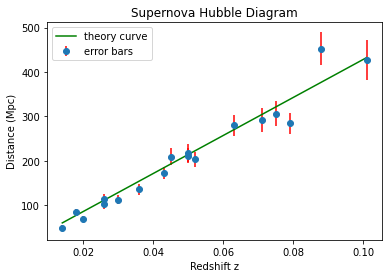

In [13]:
# Notice three new features this week
# 1. plotting errorbars instead of just points or lines
# 2. plotting a function (any valid python or scipy expression depending on x)
# 3. drawing to a file.


def distance(z):
    """Convert a redshift into a distance (Mpc) assuming H0=70 km/s Mpc^-1"""
    c=299792.458 # speed of light, km/s.
    v=z*c         # First-order approximation.
    H0 = 70.      # A possible Hubble constant.
    return v/H0   # Distance given the redshift.

from pylab import *
errorbar(z,d,derr,ecolor='r', fmt='o', label="error bars") # Error bars. Circles at points.  No line
xlabel('Redshift z')                   # Axis title and overall title
ylabel('Distance (Mpc)')              
title('Supernova Hubble Diagram') 
plot(z,distance(z), color='green', label="theory curve")     # Overplot a theory curve
legend(loc='upper left')
savefig('sample_hubble.png')